# This Project explores Covid19 Data and Showed Database connection with python and simple descriptive statistics

# Author: Amobichukwu Amanambu

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests #to download data
import geopandas as gpd # for mapping
from shapely.geometry import Point, Polygon # mppig polygon files 
import wget as wg # for extarcting files
import zipfile as zp #for extracting files
import psycopg2 #importing the PostgresSQL
import seaborn as sns #for plotting

Resources:
1, GeoPandas 101: Plot any data with a latitude and longitude on a map (Ryan Stewart, 2018).https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

Geeksforgeeeks: https://www.geeksforgeeks.org/

2, Pandas iloc and loc – quickly select data in DataFrames (shanelynn.ie)
Shane. https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/

3, ArcGIS Online. Predictive Analysis of the 2019 Novel Coronavirus Pandemic. https://developers.arcgis.com/python/sample-notebooks/covid19-part3-predictive-analysis/

Data:
1, Joh Hopkings dynamic Covid data (CSSEGISandData · GitHub). https://github.com/CSSEGISandData
2, Parch and Posey database. http://udacity.com

In [4]:
# Downlaod a Dynamic Covid 19 data from a githurb that collects data from different sourcses
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
US_Covid_df = pd.read_csv(url, header=0, escapechar='\\') # read the file as csv/dataframe

#Display the head of the data
display("shape of the dataframe in  rows & columns):" '' + str(US_Covid_df.shape))
display('tabel head of first 6 of confirmed cases',US_Covid_df.head(6))

'shape of the dataframe in  rows & columns):(3342, 778)'

'tabel head of first 6 of confirmed cases'

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15387,15409,15420,15431,15436,15442,15451,15468,15479,15503
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,54663,54700,54734,54763,54784,54805,54837,54874,54904,54957
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5422,5424,5426,5429,5429,5430,5433,5436,5438,5440
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6345,6349,6351,6354,6355,6360,6364,6367,6369,6374
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,14632,14643,14663,14672,14682,14688,14706,14710,14734,14753
5,84001011,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,...,2271,2271,2272,2273,2273,2276,2278,2280,2280,2278


In [1]:
#display column names
# US_Covid_df.columns

# look up data and fix any none matching columns and rows

#US_Covid_df.tail()

# US_Covid_df[US_Covid_df["Admin2"].notna()].head()

Keep exploring

In [5]:
# infection rate by state 

drop_data = US_Covid_df.drop(columns=["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", 
                                             "Combined_Key", "Lat", "Long_", "Country_Region"]) # delete uneeded columns

# groups all states that are similar in naming (e.g FL, NY etc)
group_state = drop_data.groupby(['Province_State'])

# sum individual data for the grouped state
sum_group = group_state.sum() 

# select the South eastern states using the loc method that access the rows and return them as series
select_SE_states = sum_group.loc[["Alabama", "Arizona", "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland",
                               "Mississippi","North Carolina", "South Carolina", "Virginia", "West Virginia"]]
select_SE_states.head()


# # # compare Feb 15 2020 vs 2021 vs 2022
print(select_SE_states[["2/15/20", "2/15/21", "2/15/22"]])

#prepare data for plotting
# dataset used was one year 2/22/2021 to 2/22/2022 (subset)
select_SE_states = select_SE_states.drop(select_SE_states.iloc[:, 0:397], axis = 1) 

# # show some of the data set 
display("show me no of rows and colummns" '' + str(select_SE_states.shape)) 
display('header',select_SE_states.head())


                2/15/20  2/15/21  2/15/22
Province_State                           
Alabama               0   481605  1265932
Arizona               1   798608  1953168
Florida               0  1830988  5776333
Georgia               0   966807  2443410
Kentucky              0   389521  1244139
Louisiana             0   420394  1153232
Maryland              0   371705   994096
Mississippi           0   287980   782689
North Carolina        0   824352  2543260
South Carolina        0   489018  1443723
Virginia              0   551538  1613719
West Virginia         0   127889   477935


'show me no of rows and colummns(12, 370)'

'header'

,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,...,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,487520,488973,490220,491110,491849,492683,493252,493769,494421,497154,...,1270015,1271455,1272608,1273092,1273484,1274123,1275355,1276580,1277837,1279006
Arizona,809474,810658,811968,812907,814528,815707,816782,817821,818670,819954,...,1959866,1962920,1962920,1967702,1967704,1970442,1971678,1973479,1975252,1976890
Florida,1872923,1878533,1885661,1892301,1898223,1903682,1909221,1910921,1918100,1924114,...,5776333,5818706,5818706,5818706,5818706,5818706,5818706,5818706,5818706,5844229
Georgia,987041,990821,994061,997388,1000822,1004187,1006521,1008660,1011807,1014542,...,2448939,2451908,2451908,2451908,2455573,2456866,2458946,2461103,2462663,2462663
Kentucky,397526,399013,400307,401750,402926,403947,404622,405126,406201,407373,...,1254101,1258447,1258447,1258447,1264329,1267592,1270258,1270258,1274681,1274681


<AxesSubplot:title={'center':'One year Covid Rise (normalised)'}>

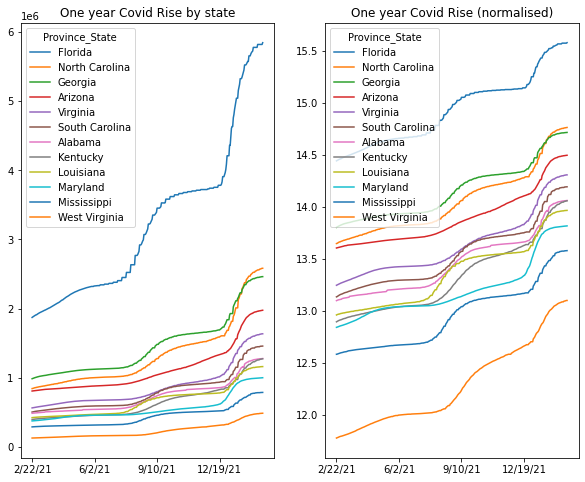

In [20]:
# Sort and Plot

# # sort series in asceding order
sort_series = select_SE_states.sort_values(by=[select_SE_states.columns[-1]], ascending=False).head(15)

#make a plot to compare states
figure, axis = plt.subplots(1, 2) # set how many are figures needed by setting a 1 row , 2 columns axis

#transpose the series to plot. make plot by assigning defining parameters
sort_series.transpose().plot(ax = axis[0], figsize = (10, 8), title = "One year Covid Rise by state") 

# log normaalised for comparison
sort_series.transpose().apply(np.log).plot(ax = axis[1], figsize = (10, 8), title = "One year Covid Rise (normalised)") 

In [6]:
#Create a date series and compare states

# Group By a Dataframe in Pandas and keep Columns
group_retain = US_Covid_df.groupby(['Province_State']).count().reset_index() 

#drop some data
group_retain_df = group_retain.drop(columns=["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", 
                                             "Combined_Key"])
#sum all the covida cases
group_retain_df["Sum_total"] =  group_retain_df[group_retain_df.columns[1:]].sum(axis=1) 

#make the list of the dates (date list)

date_series = group_retain.columns.tolist()[11:]
date_series[0], date_series[-1]

# what is the the state with the highest infection by date?
select_SE_states[date_series[-1]].idxmax(), select_SE_states[date_series[-1]].max()
print(select_SE_states)

                2/22/21  2/23/21  2/24/21  2/25/21  2/26/21  2/27/21  2/28/21  \
Province_State                                                                  
Alabama          487520   488973   490220   491110   491849   492683   493252   
Arizona          809474   810658   811968   812907   814528   815707   816782   
Florida         1872923  1878533  1885661  1892301  1898223  1903682  1909221   
Georgia          987041   990821   994061   997388  1000822  1004187  1006521   
Kentucky         397526   399013   400307   401750   402926   403947   404622   
Louisiana        424644   426048   426925   427689   428592   428592   430100   
Maryland         376966   377628   378490   379466   380436   381272   382099   
Mississippi      290874   291222   291891   292811   293542   294091   294795   
North Carolina   844770   846284   849630   852981   855905   858548   858548   
South Carolina   505589   506912   509044   511546   513295   515072   516823   
Virginia         565270   56

# Mapping and exporing Spatial infection

    ID_0  ISO         NAME_0  ID_1          NAME_1 TYPE_1 ENGTYPE_1 NL_NAME_1  \
0    244  USA  United States     1         Alabama  State     State      None   
1    244  USA  United States     4        Arkansas  State     State      None   
2    244  USA  United States    10         Florida  State     State      None   
3    244  USA  United States    11         Georgia  State     State      None   
4    244  USA  United States    18        Kentucky  State     State      None   
5    244  USA  United States    19       Louisiana  State     State      None   
6    244  USA  United States    21        Maryland  State     State      None   
7    244  USA  United States    34  North Carolina  State     State      None   
8    244  USA  United States    41  South Carolina  State     State      None   
9    244  USA  United States    43       Tennessee  State     State      None   
10   244  USA  United States    47        Virginia  State     State      None   
11   244  USA  United States

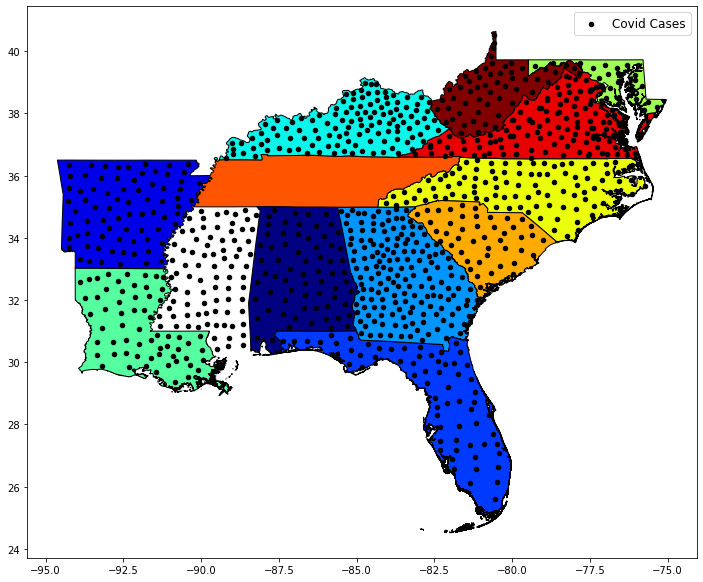

In [22]:
#Select interested data
SE_states_cord  = US_Covid_df[["Province_State", "Lat", "Long_"]]

#Set index on a Dataframe and select interested Long and Lat  
SE_states_cord.set_index("Province_State", inplace = True)
SE_states0  = SE_states_cord.loc[["Alabama", "Arkansas", "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland",
                               "Mississippi","North Carolina", "South Carolina", "Virginia", "West Virginia"]]

# remove any cordinate with zero value

SE_states0 = SE_states0.loc[~(SE_states0 == 0).all(axis = 1)]


#Check by using the loc method to to access a group of rows
SE_states0.loc[["Alabama", "Florida"]]
SE_states0.head(-50)

#create a cordinate (long and lat) dataframe for mapping
US_cord_geometry = [Point(xy) for xy in zip(SE_states0["Long_"], SE_states0["Lat"])]

# Print data
#print(US_cord_geometry)

# # read the map shapefile data from the directory using geopandas
SE_maps = gpd.read_file(r"C:\Users\dell\Desktop\results\SEastUSA.shp") #import soutth eastern US map

SE_maps

print(SE_maps)
# #check the prjection to know projected cordinte system
#A Coordinate reference system (CRS) defines, with the help of coordinates, 
#how the two-dimensional, projected map is related to real locations on the earth
SE_maps.crs

# # #create a greographic dataframe

SE_geo_df = gpd.GeoDataFrame(SE_states0,
                            crs = 4326, #
                            geometry = US_cord_geometry)

# # #plot
fig, ax = plt.subplots(figsize =(12,12)) # make  a plot with 12 by 12 size
SE_maps.plot(ax = ax, cmap = "jet", edgecolor = "black", column = "NAME_1", label = "NAMES_1") #introduce a color scheme and color the edges black
SE_geo_df.plot(ax = ax, markersize = 20, color = "black", marker = "o", label = "Covid Cases", aspect = 1) #introduce map parameters and label the legend"
plt.legend(prop = {"size": 12}) #display the legend on the map


let's look at florida where i live

100% [..........................................................................] 1002161 / 1002161

<AxesSubplot:>

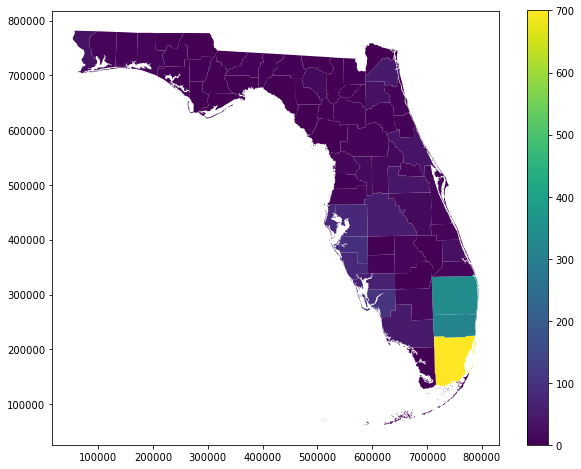

In [7]:
#downlaod Geographic data with covid death record for Florida
url = "https://www.arcgis.com/sharing/rest/content/items/f33a0c00fcab44b0ade3d09fd1283734/data"

# download the geographic data using the wget package
wg.download(url)

#unzip the zipped file to extract the geographic covid data
with zp.ZipFile("Florida_COVID19_05302020_ByCounty.zip", "r") as zip_ref:
    zip_ref.extractall(r'C:\Users\dell\Desktop\results')
    
#import the map from the downloaded directory. #note that an island was removed from the original 
#data to make the map more plotable
counties_covid = gpd.read_file(r"C:\Users\dell\Desktop\result\Florida_COVID_Cases.shp")

#  #plot map and give colours to the county map based on attribute tabe

fig, (axis) = plt.subplots(ncols = 1, figsize = (10,8))
# counties_covid.plot(ax = axis1, cmap = "hsv", edgecolor = "black", column = "COUNTYNAME")
counties_covid.plot(column = "Deaths", ax = axis, legend =True)

# Connect to a database and manipulate data

In [37]:
import psycopg2 as psy #import PostgresSql

#connect to local PostgresSQL and database
conn = psy.connect(
            host = "localhost", #database server address
            database = "Parch and Posey", #name of the data base in the SQL
            password =  "1122aabb", #password use to authenticate when loggoing into sql
            user = "postgres", #the name used to authenticate
            port = "5432")  #the port number that defaults to "5432"

#create a cursor used to make the connection

cursor = conn.cursor()

#Data provided by Udacity.com. 
#It describes company purchase of papers, the amount they paid and the quality of the paper purchased

In [38]:
#write an sql code to join different tables and bring them into Jupyter notebook
orders = pd.read_sql("""
           SELECT o.*, r.name region, a.name acct_name
           FROM region r  
           JOIN sales_reps s
           ON s.region_id = r.id
           JOIN accounts a
           ON a.sales_rep_id = s.id
           JOIN orders o
           ON o.account_id = a.id;
           
""",conn) #join tables to get importnat data


display("show me the shape of the dataframe in columns & rows):" '' + str(orders.shape))
display('show header of first 10 of purchase from',orders.head(10))

C:\Users\dell\anaconda3\envs\my_env\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


'show me the shape of the dataframe in columns & rows):(6912, 13)'

'show header of first 10 of purchase from'

,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd,region,acct_name
0,1,1001,2015-10-06 17:31:14,123,22,24,169,613.77,164.78,194.88,973.43,Northeast,Walmart
1,2,1001,2015-11-05 03:34:33,190,41,57,288,948.10,307.09,462.84,1718.03,Northeast,Walmart
2,3,1001,2015-12-04 04:21:55,85,47,0,132,424.15,352.03,0.00,776.18,Northeast,Walmart
3,4,1001,2016-01-02 01:18:24,144,32,0,176,718.56,239.68,0.00,958.24,Northeast,Walmart
4,5,1001,2016-02-01 19:27:27,108,29,28,165,538.92,217.21,227.36,983.49,Northeast,Walmart
5,6,1001,2016-03-02 15:29:32,103,24,46,173,513.97,179.76,373.52,1067.25,Northeast,Walmart
6,7,1001,2016-04-01 11:20:18,101,33,92,226,503.99,247.17,747.04,1498.20,Northeast,Walmart
7,8,1001,2016-05-01 15:55:51,95,47,151,293,474.05,352.03,1226.12,2052.20,Northeast,Walmart
8,9,1001,2016-05-31 21:22:48,91,16,22,129,454.09,119.84,178.64,752.57,Northeast,Walmart
9,10,1001,2016-06-30 12:32:05,94,46,8,148,469.06,344.54,64.96,878.56,Northeast,Walmart


In [39]:
#descriptive statitsics
columns_variable = orders.iloc[:,3:] # select some columns and all rows

#display data

display('header',columns_variable.head())

#mean
columns_variable.groupby(['acct_name']).describe()

'header'

,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd,region,acct_name
0,123,22,24,169,613.77,164.78,194.88,973.43,Northeast,Walmart
1,190,41,57,288,948.10,307.09,462.84,1718.03,Northeast,Walmart
2,85,47,0,132,424.15,352.03,0.00,776.18,Northeast,Walmart
3,144,32,0,176,718.56,239.68,0.00,958.24,Northeast,Walmart
4,108,29,28,165,538.92,217.21,227.36,983.49,Northeast,Walmart


standard_qty                                         \
                           count        mean         std    min     25%   
acct_name                                                                 
3M                          28.0  313.392857  229.317399   55.0  105.25   
ADP                         60.0  354.633333  324.661961    0.0   19.50   
AECOM                        9.0  363.777778  211.755624    0.0  250.00   
AES                          3.0  254.666667  161.444521   69.0  201.00   
AIG                          2.0  300.500000  276.478751  105.0  202.75   
...                          ...         ...         ...    ...     ...   
World Fuel Services          4.0  208.000000  221.485891   88.0   94.00   
Xcel Energy                  6.0  417.166667  185.745435   42.0  458.75   
Xerox                        4.0  266.750000  299.669123    0.0   11.25   
Yum Brands                  15.0  280.733333  251.364694    0.0    0.00   
eBay                        35.0  361.714286  281.893552    0.0   10.50   

                                           gloss_qty              ...  \
                       50%     75%     max     count        mean  ...   
acct_name                                                         ...   
3M                   242.0  495.50   773.0      28.0  279.750000  ...   
ADP                  483.0  497.50  2123.0      60.0   60.533333  ...   
AECOM                487.0  502.00   515.0       9.0   13.888889  ...   
AES                  333.0  347.50   362.0       3.0  304.000000  ...   
AIG                  300.5  398.25   496.0       2.0  349.000000  ...   
...                    ...     ...     ...       ...         ...  ...   
World Fuel Services  102.0  216.00   540.0       4.0  206.750000  ...   
Xcel Energy          485.0  503.75   531.0       6.0  157.000000  ...   
Xerox                263.0  518.50   541.0       4.0   19.000000  ...   
Yum Brands           495.0  504.00   522.0      15.0   38.666667  ...   
eBay                 488.0  504.00  1317.0      35.0   32.228571  ...   

                    poster_amt_usd          total_amt_usd               \
                               75%      max         count         mean   
acct_name                                                                
3M                         1425.06  5359.20          28.0  4569.467857   
ADP                         284.20  7957.60          60.0  2726.319667   
AECOM                       194.88   332.92           9.0  2054.612222   
AES                        1197.70  2371.04           3.0  4346.213333   
AIG                        1242.36  1607.76           2.0  4990.465000   
...                            ...      ...           ...          ...   
World Fuel Services         219.24   292.32           4.0  2708.277500   
Xcel Energy                 117.74   154.28           6.0  3329.318333   
Xerox                       767.34  2703.96           4.0  2189.982500   
Yum Brands                  259.84   893.20          15.0  1886.435333   
eBay                        446.60  8233.68          35.0  2692.698286   

                                                                           \
                             std      min        25%       50%        75%   
acct_name                                                                   
3M                   4160.971378   673.78  1015.2300  2085.460  8365.3250   
ADP                  2354.265087   121.80  1187.1650  2579.610  2830.6275   
AECOM                1044.324646   199.60  1328.7000  2577.640  2708.5400   
AES                  2080.166977  2277.74  3300.3800  4323.020  5380.4500   
AIG                  5781.538388   902.30  2946.3825  4990.465  7034.5475   
...                          ...      ...        ...       ...        ...   
World Fuel Services  3510.429343   711.23   984.7925  1077.160  2800.6450   
Xcel Energy          2914.628094   381.85  2453.1825  2561.535  2958.3450   
Xerox                1426.803724    74.85  2023.3725  2747.135

Text(0.5, 0, 'Total amount in dollars')

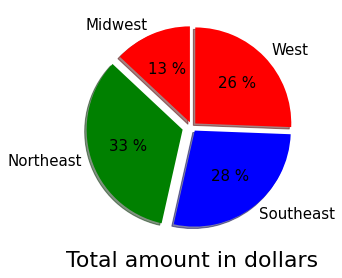

In [40]:
#Pie chart by region
 #for Total amount in dollars
total_amt_aggreg = columns_variable.groupby(by= "region") [["total_amt_usd"]].sum()
index_reset2 = total_amt_aggreg.reset_index() 

#for standard amount in dollars
standard_amt_aggreg = columns_variable.groupby(by= "region") [["standard_amt_usd"]].sum()
index_reset3 = standard_amt_aggreg.reset_index()


#Set parameters
plt.rcParams["figure.figsize"] = [5, 5] # chart size
plt.rcParams["figure.autolayout"] = True # allow the layout to be determined by python
plt.rcParams.update({'font.size': 22})

#plot pie with colors exploding parameters and labels
plt.pie(x = "total_amt_usd", labels = "region", textprops = {'fontsize': 15}, data = index_reset2, autopct ="%.0f %%", 
        colors = ["r", "g", "b"], startangle = 90, shadow = True, explode = (0.05, 0.1, 0.05, 0.05)) #plot pie
plt.xlabel("Total amount in dollars")

#############################################################################################################################



Text(0.5, 0, 'Sum amount in dollars')

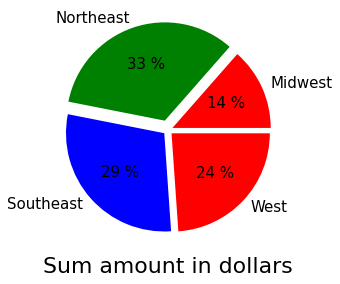

In [24]:
#Set parameters for plot
plt.rcParams["figure.figsize"] = [5, 5] # chart size
plt.rcParams["figure.autolayout"] = True # allow the layout to be determined by python
plt.rcParams.update({'font.size': 22})

#plot pie with colors exploding parameters and labels
plt.pie(x = "standard_amt_usd", labels = "region", textprops = {'fontsize': 15}, data = index_reset3, autopct ="%.0f %%", 
        colors = ["r", "g", "b"], explode = (0.05, 0.1, 0.05, 0.05))  
plt.xlabel("Sum amount in dollars")